### Individual performance of 40 participants
Shows each participant's learning curve in the three phases (pre, AI, post), their free-text strategy comments, bonus payment and AI ratings.

In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, MultipleLocator
import statistics
import numpy as np
from common import set_matplotlib_latex, plot_colours, set_axes_length
set_matplotlib_latex()

plot_width = 1.05
plot_height = 0.7

data_path = "../data/ColourCombo_40_anonymised.json"
phase_round_numbers = {
    "pre_treatment": [1, 2, 3],
    "ai": [4, 5, 6, 7, 8, 9],
    "post_treatment": [10, 11, 12]
}
participants_data = []

with open(data_path) as file:
    all_data = json.load(file)
    for participant_data in all_data:
            participants_data.append(participant_data)

In [2]:
def print_participant_info(participant_data):
    print(f"Participant id: {participant_data['id']}")
    print(f"Bonus payment: {participant_data['experimentData']['bonusReward']}")
    # print the AI ratings
    useful_ai_rounds = []
    for round_number in phase_round_numbers["ai"]:
        round_data = participant_data["experimentData"]["roundsData"][round_number]
        useful_ai_rounds.append(float(round_data["usefulAiRound"]))
    print(f"Followed: {participant_data['experimentData']['followedAi']}, Useful: {participant_data['experimentData']['usefulAi']}, Average: {np.round(statistics.mean(useful_ai_rounds), 1)}")
    print(f"Usefulness per round: {useful_ai_rounds}")
    print()
    print(f"Strategy with AI:\n{participant_data['experimentData']['strategyAi']}")
    print()
    print(f"Strategy without AI:\n{participant_data['experimentData']['strategyOwn']}")

def plot_performance_pre_ai_post_per_participant(participants):
    for participant_data in participants:
        print_participant_info(participant_data)
        phases_performances = {}
        for phase, round_numbers in phase_round_numbers.items():
            phase_performances = []
            for round_number in round_numbers:
                round_performance = []
                round_data = participant_data["experimentData"]["roundsData"][round_number]
                min_reward = round_data["landscape"]["minReward"]
                max_reward = round_data["landscape"]["maxReward"]
                for trial in round_data["trials"]:
                    reward = trial["noisyReward"]
                    relative_reward = (reward - min_reward) / (max_reward - min_reward) * 100
                    round_performance.append(relative_reward)
                phase_performances.append(round_performance)
            phase_performances = np.asarray(phase_performances)
            phases_performances[phase] = np.mean(phase_performances, axis=0)
        
        trial_numbers = list(range(1, 21)) 
        for phase, performances in phases_performances.items():
            label = "Pre" if phase == "pre_treatment" else "AI" if phase == "ai" else "Post"
            colour_index = 2 if phase == "pre_treatment" else 3 if phase == "ai" else 4
            plt.plot(trial_numbers, performances, color=plot_colours["distinctColours"][colour_index], label=label)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.gca().xaxis.set_major_locator(FixedLocator([1, 7, 14, 20]))
        plt.gca().yaxis.set_major_locator(MultipleLocator(base=10))
        set_axes_length(plot_width, plot_height)
        plt.show()
        
def plot_histograms_pre_ai_post():
    phases_scores_low = {}
    phases_scores_high = {}
    for phase in phase_round_numbers.keys():
        phases_scores_low[phase] = []
        phases_scores_high[phase] = []
    for participant_data in participants_data:
        phases_scores = {}
        for phase, round_numbers in phase_round_numbers.items():
            for round_number in round_numbers:
                round_score = participant_data["experimentData"]["roundsData"][round_number]["relativeScore"]
                if phase in phases_scores.keys():
                    phases_scores[phase].append(round_score * 100)
                else:
                    phases_scores[phase] = [round_score]
        if participant_data["experimentData"]["recommendationType"] == "low":
            for phase, scores in phases_scores.items():
                phases_scores_low[phase].extend(scores)
        else:
            for phase, scores in phases_scores.items():
                phases_scores_high[phase].extend(scores)
    bins = [0, 20, 40, 60, 80, 100]
    for phase in phase_round_numbers.keys():
        phase_label = "Pre" if phase == "pre_treatment" else "AI" if phase == "ai" else "Post"
        print(phase_label)
        plt.hist([phases_scores_low[phase], phases_scores_high[phase]], bins=bins, label=['Local', 'Global'], color=[plot_colours["local"], plot_colours["global"]])
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        set_axes_length(plot_width, plot_height)
        plt.gca().xaxis.set_major_locator(FixedLocator(bins))
        plt.show()

### Mean round scores across the Pre, AI, Post phases

Pre


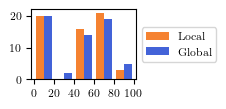

AI


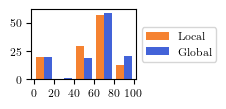

Post


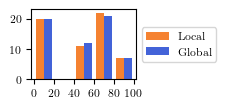

In [3]:
plot_histograms_pre_ai_post()

### Results of participants in the local setting

Participant id: 3
Bonus payment: 1.97
Followed: 1, Useful: 1, Average: 1.0
Usefulness per round: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Strategy with AI:
I first started with the AI suggestion, then I moved on to my trial and error method.

Strategy without AI:
Trial and error.


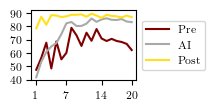

Participant id: 5
Bonus payment: 0.93
Followed: 6, Useful: 5, Average: 3.5
Usefulness per round: [2.0, 2.0, 5.0, 4.0, 2.0, 6.0]

Strategy with AI:
I found myself trusting the AI's suggestions more than I should have. In the first 3 / 4 rounds of using the AI, it's suggestions were not very useful for a high score but these did change later in the rounds, so I began to trust it even more.

Strategy without AI:
Finding the highest scoring combo colour I can with random choices and making small changes on the variations to try and find the highest possible score


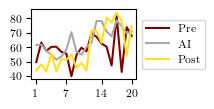

Participant id: 7
Bonus payment: 1.38
Followed: 6, Useful: 5, Average: 4.3
Usefulness per round: [6.0, 4.0, 5.0, 4.0, 3.0, 4.0]

Strategy with AI:
I would adjust even if the combo gave > 130.

Strategy without AI:
When I hit ~130+ I kept that combo.


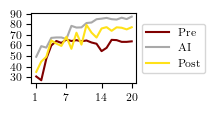

Participant id: 9
Bonus payment: 0.9
Followed: 7, Useful: 7, Average: 6.8
Usefulness per round: [7.0, 7.0, 7.0, 7.0, 6.0, 7.0]

Strategy with AI:
It always keep two sides same and make you suggest the other, so it also make some of the correct square suggestions for you

Strategy without AI:
basing on the AI's suggesting I keep two side equal and select different sides


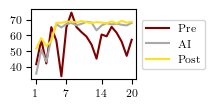

Participant id: 15
Bonus payment: 0.79
Followed: 7, Useful: 7, Average: 6.8
Usefulness per round: [6.0, 7.0, 7.0, 7.0, 7.0, 7.0]

Strategy with AI:
following AI and trying to use their pattern as a base

Strategy without AI:
trying to see if there were any patterns


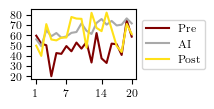

Participant id: 17
Bonus payment: 0.13
Followed: 5, Useful: 5, Average: 3.7
Usefulness per round: [7.0, 5.0, 1.0, 1.0, 2.0, 6.0]

Strategy with AI:
when i click on one and its high
i focus on it

Strategy without AI:
when i click on one and its high
i focus on it


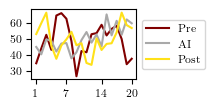

Participant id: 19
Bonus payment: 1.64
Followed: 5, Useful: 5, Average: 4.0
Usefulness per round: [2.0, 2.0, 6.0, 6.0, 3.0, 5.0]

Strategy with AI:
I followed the AI initial suggestion, which seemed to work, and then followed by usual procedure, as following the AI didn't seem to work after the first suggestion.

Strategy without AI:
All rectangles identical with both squares the same colour. Varying one rectangle by changing both squares. If the points went up I moved to the next rectangle. If the points didn't go up I returned the rectangle to its previous state. When I reckoned I couldn't increase the points, I continued by varying each individual square and seeing if that was an improvement. Basically trial and error with the good combos preserved. When I reached a decent points return I copied that combo for the rest of the test to avoid losing too much by experimenting.


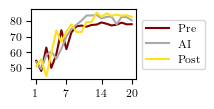

Participant id: 21
Bonus payment: 0.99
Followed: 1, Useful: 1, Average: 1.0
Usefulness per round: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Strategy with AI:
combining the different colours

Strategy without AI:
just played with different combination of colour and stayed with the one giving the highest scores


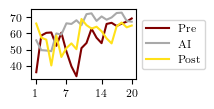

Participant id: 23
Bonus payment: 1.05
Followed: 5, Useful: 5, Average: 5.7
Usefulness per round: [5.0, 6.0, 6.0, 7.0, 5.0, 5.0]

Strategy with AI:
I used the same, initially looked at suggestions and sometimes decided to ignore the suggestions

Strategy without AI:
Experimented and anything over 100 was the one I selected


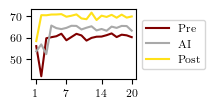

Participant id: 25
Bonus payment: 0.39
Followed: 5, Useful: 4, Average: 3.8
Usefulness per round: [5.0, 4.0, 3.0, 3.0, 4.0, 4.0]

Strategy with AI:
I followed AI's suggestions to see if the score was particular higher, if it was I stuck to the pattern it showed

Strategy without AI:
Trying to make sure I did all the variations


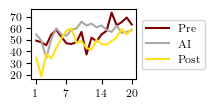

Participant id: 27
Bonus payment: 1.49
Followed: 6, Useful: 5, Average: 4.8
Usefulness per round: [5.0, 4.0, 6.0, 4.0, 4.0, 6.0]

Strategy with AI:
Starting with the AI and working from there

Strategy without AI:
trial and error and then trusting a score of 130+


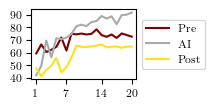

Participant id: 29
Bonus payment: 0.72
Followed: 3, Useful: 3, Average: 2.0
Usefulness per round: [1.0, 3.0, 5.0, 1.0, 1.0, 1.0]

Strategy with AI:
Pick random colors at first then follow the pattern of the AI

Strategy without AI:
Make all squares the same color


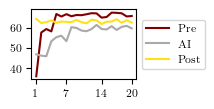

Participant id: 31
Bonus payment: 1.57
Followed: 5, Useful: 5, Average: 5.2
Usefulness per round: [5.0, 6.0, 6.0, 5.0, 6.0, 3.0]

Strategy with AI:
I tested out the AIs suggestions and tried to quickly ascertain whether they were helpful.

Strategy without AI:
Quickly trying a few combinations until I found the highest scoring one and then generally sticking with that one for the remainder of the selections.


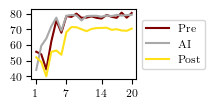

Participant id: 33
Bonus payment: 1.46
Followed: 6, Useful: 5, Average: 4.5
Usefulness per round: [5.0, 4.0, 5.0, 5.0, 4.0, 4.0]

Strategy with AI:


Strategy without AI:


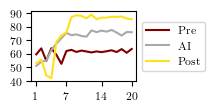

Participant id: 35
Bonus payment: 0.98
Followed: 4, Useful: 5, Average: 3.8
Usefulness per round: [3.0, 3.0, 2.0, 6.0, 4.0, 5.0]

Strategy with AI:
No particular strategy

Strategy without AI:
Figured out which combo gave the bigger points


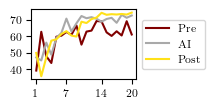

Participant id: 37
Bonus payment: 1.16
Followed: 6, Useful: 6, Average: 5.7
Usefulness per round: [6.0, 6.0, 6.0, 7.0, 4.0, 5.0]

Strategy with AI:
Copied the AI's model and experimented with the other squares

Strategy without AI:
Trial and error. Working through each change one by one


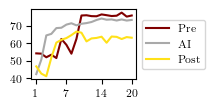

Participant id: 39
Bonus payment: 0.96
Followed: 3, Useful: 3, Average: 4.3
Usefulness per round: [3.0, 3.0, 5.0, 5.0, 4.0, 6.0]

Strategy with AI:
have a look at what it says and see what happens 

Strategy without AI:
tried to find out as many options as possible 


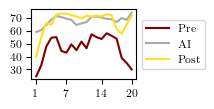

Participant id: 41
Bonus payment: 1.24
Followed: 5, Useful: 4, Average: 3.3
Usefulness per round: [5.0, 6.0, 3.0, 2.0, 2.0, 2.0]

Strategy with AI:
i tweaked it based on the ai suggestion

Strategy without AI:
repitition of options that were of the most value


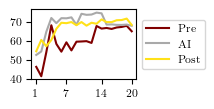

Participant id: 45
Bonus payment: 0.95
Followed: 5, Useful: 3, Average: 2.5
Usefulness per round: [2.0, 1.0, 4.0, 1.0, 3.0, 4.0]

Strategy with AI:
i marked same as Ai then changed the remaing two but it was not so much effective

Strategy without AI:
used the point to know how many more point is needed


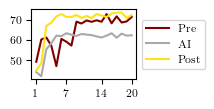

Participant id: 47
Bonus payment: 1.21
Followed: 7, Useful: 5, Average: 3.8
Usefulness per round: [3.0, 5.0, 6.0, 5.0, 3.0, 1.0]

Strategy with AI:
Exactly the same strategy as above but using the ai's recommendation consistently and then making one change until I got the highest value

Strategy without AI:
Didn't really have a strategy as I was struggling to make the connection of how to get the highest value, I just kept trying to make one change at a time rather than lots of changes


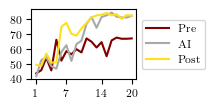

In [4]:
local_participants = [participant_data for participant_data in participants_data if participant_data["experimentData"]["recommendationType"] == "low"]

plot_performance_pre_ai_post_per_participant(local_participants)

### Results of participants in the global setting

Participant id: 4
Bonus payment: 1.01
Followed: 2, Useful: 1, Average: 1.7
Usefulness per round: [2.0, 2.0, 1.0, 1.0, 1.0, 3.0]

Strategy with AI:
I tried using it's suggestions to begin with but I found my own methodology better, so I just ignored the AI after a few rounds.

Strategy without AI:
I started with all rectangles the same, in one colour, then the next and then tried to determine which one carried the most points. I would then play around a little with the combination but once it became clear that I had found the highest combination, I just repeated it until the end of the round.


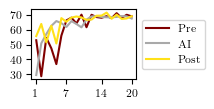

Participant id: 8
Bonus payment: 0.94
Followed: 6, Useful: 7, Average: 6.2
Usefulness per round: [5.0, 7.0, 4.0, 7.0, 7.0, 7.0]

Strategy with AI:
I followed up the AI suggestion almost all the rounds

Strategy without AI:
I tried using the color combination that is most gives the highest score at each interval


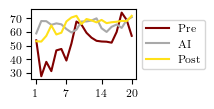

Participant id: 10
Bonus payment: 1.53
Followed: 3, Useful: 2, Average: 2.3
Usefulness per round: [1.0, 2.0, 2.0, 2.0, 2.0, 5.0]

Strategy with AI:
I quickly learned to ignore the suggestions as they were not helpful.

Strategy without AI:
Once I hit on a relatively high scoring schema I stuck with it.


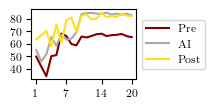

Participant id: 12
Bonus payment: 1.54
Followed: 5, Useful: 5, Average: 5.0
Usefulness per round: [5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

Strategy with AI:
used AI to find highest points then continued with that combo

Strategy without AI:
looked for highest points for combo and went with that


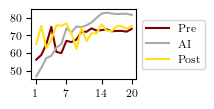

Participant id: 14
Bonus payment: 0.69
Followed: 7, Useful: 6, Average: 6.8
Usefulness per round: [7.0, 7.0, 7.0, 7.0, 7.0, 6.0]

Strategy with AI:
trying to spot patterns

Strategy without AI:
patterns 


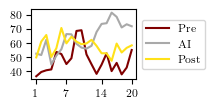

Participant id: 16
Bonus payment: 1.67
Followed: 6, Useful: 6, Average: 5.5
Usefulness per round: [5.0, 5.0, 3.0, 7.0, 7.0, 6.0]

Strategy with AI:
Not changing it even if it recommended to do so.

Strategy without AI:
Finding the best combo and sticking to it rather than risking changing it.


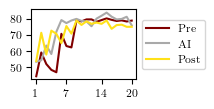

Participant id: 18
Bonus payment: 1.87
Followed: 5, Useful: 5, Average: 4.3
Usefulness per round: [6.0, 3.0, 2.0, 5.0, 5.0, 5.0]

Strategy with AI:
Try a bunch of different combinations to train the AI, then tried to match the AI's recommendations with different color squares. But mostly I used the same strategy as when completing the rounds on my own, because I didn't fully trust the AI to help.

Strategy without AI:
Try a bunch of different combinations to find what generated more points, and once I got a combination that felt sufficiently high enough, used that one repeatedly.


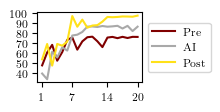

Participant id: 20
Bonus payment: 0.77
Followed: 5, Useful: 6, Average: 5.7
Usefulness per round: [6.0, 6.0, 6.0, 7.0, 4.0, 5.0]

Strategy with AI:
follow it's lead, and, once again, to make diff patterns and see what it changed

Strategy without AI:
I tried to 'shake it up', like moving the colors in every pattern that was possible and then making diff combos


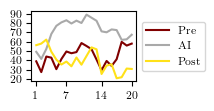

Participant id: 22
Bonus payment: 1.41
Followed: 4, Useful: 4, Average: 3.8
Usefulness per round: [4.0, 6.0, 1.0, 6.0, 4.0, 2.0]

Strategy with AI:
listened a little but sill used my own opinion more

Strategy without AI:
tried to use the ones that had the highest amount of points


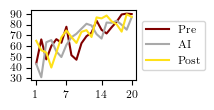

Participant id: 24
Bonus payment: 0.7
Followed: 5, Useful: 4, Average: 3.8
Usefulness per round: [3.0, 2.0, 5.0, 5.0, 6.0, 2.0]

Strategy with AI:
I only focused on the rectnagle colors and tried to match them with the AI

Strategy without AI:
My priority was first alternating colors of the rectangle then modifying the squares until I had a high score then repeated until the score started lowering then changing the colors again


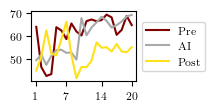

Participant id: 26
Bonus payment: 1.14
Followed: 5, Useful: 5, Average: 4.7
Usefulness per round: [5.0, 3.0, 5.0, 4.0, 6.0, 5.0]

Strategy with AI:
Rectangle colour

Strategy without AI:
Rectangle colour


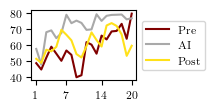

Participant id: 30
Bonus payment: 1.35
Followed: 2, Useful: 1, Average: 1.7
Usefulness per round: [2.0, 1.0, 2.0, 2.0, 2.0, 1.0]

Strategy with AI:
Trying what the AI said a couple of times, if this was not helping ignoring the AI.

Strategy without AI:
Trying out a few combinations, then only using the highest score I had repeatedly.


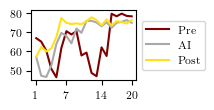

Participant id: 32
Bonus payment: 0.69
Followed: 5, Useful: 6, Average: 5.8
Usefulness per round: [6.0, 6.0, 6.0, 6.0, 6.0, 5.0]

Strategy with AI:
I used the instructions given to understand how the AI works.

Strategy without AI:
I just followed the instruction I was given from the beginning of the study.


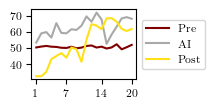

Participant id: 34
Bonus payment: 1.55
Followed: 3, Useful: 2, Average: 3.0
Usefulness per round: [2.0, 2.0, 7.0, 3.0, 3.0, 1.0]

Strategy with AI:
I verify whether the AI has selected the highest point color block, and then I determine which block to choose.

Strategy without AI:
I review the color block that yields the highest points and then replicate that block to maximize the score.


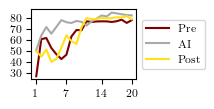

Participant id: 36
Bonus payment: 1.17
Followed: 5, Useful: 6, Average: 5.8
Usefulness per round: [5.0, 6.0, 6.0, 6.0, 6.0, 6.0]

Strategy with AI:
I stuck with the AI's recommendation once it found a good combination.

Strategy without AI:
Try different combinations until I found one over 100 points and stuck with that.


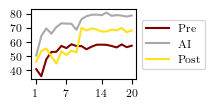

Participant id: 38
Bonus payment: 1.34
Followed: 5, Useful: 5, Average: 4.2
Usefulness per round: [4.0, 4.0, 3.0, 3.0, 6.0, 5.0]

Strategy with AI:
Just go with AI then change occasionally see if i could get more points

Strategy without AI:
Just clicked and see what gave me the most points


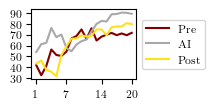

Participant id: 40
Bonus payment: 1.29
Followed: 5, Useful: 6, Average: 6.3
Usefulness per round: [4.0, 6.0, 7.0, 7.0, 7.0, 7.0]

Strategy with AI:
I leveraged the AI to narrow down potentially high-reward options while refining my own strategy.

Strategy without AI:
I focused on observing how the colour changes of the squares affected the surrounding rectangles to identify rewarding colour combinations.


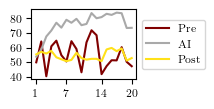

Participant id: 42
Bonus payment: 1.18
Followed: 5, Useful: 6, Average: 5.5
Usefulness per round: [5.0, 7.0, 6.0, 5.0, 4.0, 6.0]

Strategy with AI:
I tried to find the almost same suggestion as hinted by AI

Strategy without AI:
I tried to change the square and rectangle colours to fine combination with highest score


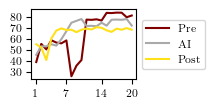

Participant id: 44
Bonus payment: 1.21
Followed: 5, Useful: 5, Average: 4.0
Usefulness per round: [3.0, 4.0, 5.0, 4.0, 7.0, 1.0]

Strategy with AI:
AI

Strategy without AI:
i follow the AI strategies


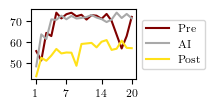

Participant id: 46
Bonus payment: 1.15
Followed: 2, Useful: 3, Average: 3.5
Usefulness per round: [2.0, 2.0, 3.0, 3.0, 4.0, 7.0]

Strategy with AI:
The AI colour combo so long the points are above 100

Strategy without AI:
I made sure i stuck to the combo patterns that gave me points above 100 for each rounds


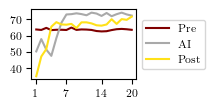

In [5]:
global_participants = [participant_data for participant_data in participants_data if participant_data["experimentData"]["recommendationType"] == "high"]

plot_performance_pre_ai_post_per_participant(global_participants)